### ETAS: Norcal 2016
#### 2016-12-06 22:03:32 (UTC) m=6.5

sacramento area


In [2]:
#
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#
import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#
#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep
import global_etas_auto as ggep
from eq_params import *
#
from nepal_figs import *
import optimizers
#
import random
import geopy

#
# on a fresh linux install... (can we script this?)
# stuff we have to do besides just clone this:
# pip install geopy
# conda install basemap
# pip install geographiclib
# conda install -c ioos rtree


In [21]:
# event was some time on the 24th or maybe late the 23rd. this, plus defaults, should find the event:
#to_dt = dtm.datetime(2016,8,25, tzinfo=pytz.timezone('UTC'))
to_dt = dtm.datetime.now(pytz.timezone('UTC'))
#
Lr_factor = 10.
# define these from the t_now in the actual etas object, in the event that we load it from pickle,
#  rather than calc it here.
#f_path = '/home/myoder/Dropbox/Research/etas/italy_2016_10/etas_{}'.format(to_dt)
#f_root = 'etas_2016'
#
# USGS:
# italy
#lat0 = 42.934
#lon0 = 13.043
#t0   = dtm.datetime(2016, 10, 26, 19, 18, 8, tzinfo=pytz.timezone('UTC'))
#m0   = 6.1
#
# newest event:
# 2016-12-06 22:03:32 (UTC)
# 5.281°N 96.108°E
t0 = dtm.datetime(2016, 12, 6, 22, 3, 32, tzinfo=pytz.timezone('UTC'))
t_ms = t0
to_dt = dtm.datetime.now(pytz.utc)
#Location
#lat0 = 40.475
##lon0 = -126.153
#lon0 = -125.15
m0 = 6.5
d_lat=3.
d_lon=3.
#lats = [lat0-d_lat, lat0+d_lat]
#lons = [lon0-d_lon, lon0+d_lon]
lons = [-122. -118.]
lats = [38.6-2., 38.6+2.]

#to_dt = t0-dtm.timedelta(hours=2)
#to_dt = dtm.datetime.now(pytz.utc)
#

In [22]:
# date_range = [dtm.datetime.now(dtm.timezone.utc)-dtm.timedelta(days=3650), dtm.datetime.now(dtm.timezone.utc)]
# #lons = [-124., -115]
# #lats = [31., 37.]

# #lats[1]=35.
# #lons[0] = -120.
# #
# print('lats: {}'.format(lats))
# print('lons: {}'.format(lons))
# print('dates: {}'.format(date_range))

# cc=atp.catfromANSS(lat=lats, lon=lons, dates0=date_range, minMag=2.5)
# print('len(cc): {}'.format(len(cc)))



In [31]:
#etas = ggep.auto_etas(to_dt=to_dt, Lr_factor=Lr_factor, dt_0=5)

eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
               't_now':to_dt, 
               'lats': lats, 'p': 1.1, 'b1': 1.0, 'mc': 1.0, 'q': 1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 1.0, 'd_lambda': 1.76, 'etas_range_padding':5., 'ab_ratio_expon':.25 }

# prototype of GlobalNet NZ catalog:
#nz_cat0 = test_cat = atp.cat_from_geonet(lats=lats, lons=lons, m_c=2.5, date_from=dtm.datetime(2000,1,1,tzinfo=atp.tzutc),
#                              date_to=dtm.datetime.now(atp.tzutc))
#nz_cat = gep.make_ETAS_catalog_mpp(incat=nz_cat0)


In [24]:
#etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=nz_cat, **eq_prams)
etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=None, **eq_prams)
#
# we've run this; we can reload it from pickle:
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas = pickle.load(fin)
#

begin globalETAS.__init()__
Overriding t0 (etas catalog start date/time) for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2011-12-13 21:53:25.284304+00:00
fetch and process catalog.
etas_prams:  {'b2': 1.5, 'date_range': [datetime.datetime(1990, 1, 1, 0, 0, tzinfo=<UTC>), datetime.datetime(2016, 12, 11, 21, 53, 25, 284304, tzinfo=<UTC>)], 'b1': 1.0, 'fit_factor': 1.0, 'd_tau': 2.28, 'do_recarray': False, 'dmstar': 1.0, 'D_fract': 1.5, 'mc': 1.5, 'incat': None, 'lons': [-128.15, -122.15], 'q': 1.5, 'd_lambda': 1.76, 'lats': [37.475, 43.475], 'p': 1.1}
data handle fetched...
 no file.
results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 59949], None)
make_etas():
etas_mpp worker xyz_range:  [0, 900]
begin globalETAS.__init()__
Overriding t0 (etas catalog start date/time) for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2011-12-13 21:53:25.284304+00:00
ETAS over etas_cat_range/xyz_range:  ([

In [25]:
event_name = 'Norcal_2016_12'
f_path = '/home/myoder/Dropbox/Research/etas/{}/etas_{}'.format(event_name, etas.t_now)
f_root = 'etas_{}'.format(event_name)

#print(etas.t0, etas.t_now, etas.t_forecast, etas.catalog[-1])
print(to_dt)
print(etas.t_0, mpd.num2date(etas.t_forecast), etas.t_now, t_ms)
#print(etas.catalog[-5:])

2016-12-11 21:53:25.284304+00:00
1990-01-01 00:00:00+00:00 2016-12-11 21:53:25.284304+00:00 2016-12-11 21:53:25.284304+00:00 2016-12-06 22:03:32+00:00


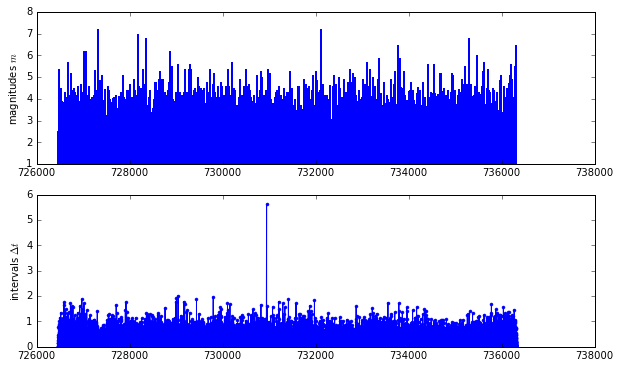

In [27]:
plt.figure(figsize=(10,6))
plt.clf()
ax1 = plt.subplot('211')
ax2 = plt.subplot('212', sharex=ax1)
#ax1.plot(etas.catalog['event_date'], etas.catalog['mag'], marker='.', ls='-', label='mag')
f_dates = [mpd.date2num(x.astype(dtm.datetime)) for x in etas.catalog['event_date']]
ax1.vlines(f_dates, (min(etas.catalog['mag'])-.5)*numpy.ones(len(etas.catalog)), 
           etas.catalog['mag'], lw=2., label='mag', color='b')
ax2.plot(f_dates[1:], numpy.diff(f_dates,1), '.-')

ax2.set_ylabel('intervals $\Delta t$')
ax1.set_ylabel('magnitudes $m$')

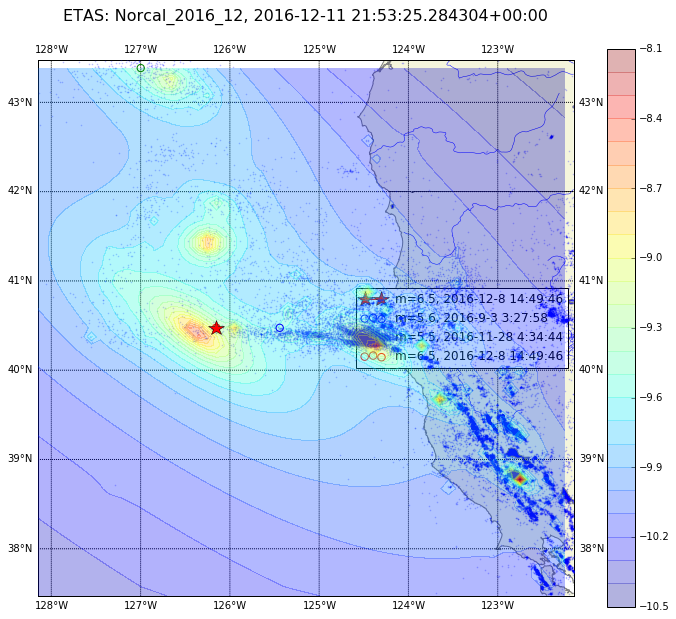

In [36]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)

#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5 
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>to_dt-dtm.timedelta(days=120)]
#
# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, {}'.format(mainshock['mag'], dt_str))
ax.set_title('ETAS: {}, {}\n\n'.format(event_name, etas.t_now), size=16)
for j,m6 in enumerate(m6s):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={}, {}'.format(m6['mag'], dt_str))
    #
etas.cm.scatter(etas.catalog['lon'], etas.catalog['lat'], s=2., edgecolors='b', c='b', marker='.', zorder=6, alpha=.2)
plt.gca().legend(loc='upper right')

In [29]:
for rw in m6s:
    print(rw)

(datetime.datetime(2016, 9, 3, 3, 27, 58, 90000), 40.4748, -125.4418, 5.6, 10.0, 736210.144422338, 10.964781961431845, 117.62230751396112, 0.0001464822992071304, 3.311311214825911, 13.675372368560344, 0.006115135490174807, 1.0, 1.1, 1.5, array([ 0.17671342,  1.48658477]), array([[-0.71084924,  0.70334441],
       [-0.70334441, -0.71084924]]), 374.0)
(datetime.datetime(2016, 11, 28, 4, 34, 44, 970000), 43.3845, -126.9986, 5.5, 29.68, 736296.1907982639, 9.772372209558107, 91.90662918649187, 0.00020862030532041022, 2.951209226666387, 10.453759247226076, 0.007908110891940318, 1.0, 1.1, 1.5, array([ 0.17671342,  1.48658477]), array([[-0.71084924,  0.70334441],
       [-0.70334441, -0.71084924]]), 81.0)
(datetime.datetime(2016, 12, 8, 14, 49, 46, 730000), 40.4753, -126.1528, 6.5, 12.08, 736306.6179019676, 30.902954325135905, 1083.3665181464153, 6.076343137532578e-06, 9.332543007969914, 153.44020166975875, 0.0006045136113058774, 1.0, 1.1, 1.5, array([ 0.17671342,  1.48658477]), array([[-0.710

In [38]:
## hey, pickling works with the new ETAS objects (or at least it appears to...):
# with open('data/etas_201610.pkl', 'wb') as fpkl:
#     pickle.dump( etas, fpkl)    
#
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas2 = pickle.load(fin)
#
#print(etas2.catalog[0:5])
# TODO: we want the datetime part of the filename to come from the etas object itself, for purposes of
# integrity. BUT, we want this script to be a bit more portable, so we should replace all the etas
# references/object name to just 'etas'
#
etas.export_kml(os.path.join(f_path, '{}_{}.kml'.format(f_root, str(etas.t_now).replace(' ', '_'))), 
                kml_contours_bottom=.25, kml_contours_top=1.0)
etas.export_xyz(os.path.join(f_path, '{}_{}.xyz'.format(f_root, str(etas.t_now).replace(' ', '_'))))
fg.savefig(os.path.join(f_path, '{}_{}.png'.format(f_root, str(etas.t_now).replace(' ', '_'))))

with open (os.path.join(f_path, '{}_{}.pkl'.format(f_root, str(etas.t_now).replace(' ', '_'))), 'wb') as fpkl:
    pickle.dump(etas, fpkl)


kml bottom, top:  6 24


In [ ]:
plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(etas.catalog['lon'], etas.catalog['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(etas.catalog['mag']))], numpy.arange(1,len(etas.catalog)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [ ]:
#print(etas.mc, etas.mc_etas)

In [ ]:
# plot a cross-section of ETAS. let's get smart about this and do a PCA on the xyz field...
#
#plt.figure()
##my_xy = [[x,y,z] for x,y in zip(etas.catalog['lon'], etas['lat']) if x>=42.25 and x<=42.75]
#my_xyz = [[x,y,z] for x,y,z in etas.ETAS_array if y>=42.25 and y<=42.75]
#plt.figure(figsize=(8,6))
#plt.plot([x for x,y,z in my_xyz ], [z for x,y,z in my_xyz], '.')

In [ ]:
mycat = atp.catfromANSS(lon=lons, lat=lats, minMag=2.5,
                        dates0=[dtm.datetime(2005,1,1, tzinfo=tzutc), None], Nmax=None, fout=None, rec_array=True)


In [ ]:
test_cat = atp.catfromANSS(lat=lats, lon=lons, minMag=1.5,
                           dates0=[dtm.datetime(1990,1,1, tzinfo=pytz.utc), dtm.datetime.now(pytz.utc)])


plt.figure()
plt.clf()
#plt.plot(test_cat['lon'], test_cat['lat'], '.')
print(test_cat[-5:])
print(max(test_cat['event_date']))

plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(test_cat['lon'], test_cat['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(test_cat['mag']))], numpy.arange(1,len(test_cat)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [35]:
for rw in etas.catalog:
    if rw['mag']>6.2: print(rw)

(datetime.datetime(1992, 4, 25, 18, 6, 5, 180000), 40.3353, -124.2287, 7.2, 9.86, 727313.7542266204, 69.18309709189366, 6092.217634813094, 5.11260559488903e-07, 20.892961308540407, 1006.0181759782834, 9.994001660636285e-05, 1.0, 1.1, 1.5, array([ 0.17671342,  1.48658477]), array([[-0.71084924,  0.70334441],
       [-0.70334441, -0.71084924]]), 16715.0)
(datetime.datetime(1992, 4, 26, 7, 41, 40, 90000), 40.4325, -124.566, 6.45, 18.82, 727314.3206028935, 29.174270140011675, 957.6437549300118, 7.251502570209195e-06, 8.810488730080147, 134.15467988128952, 0.0006874473105899355, 1.0, 1.1, 1.5, array([ 0.17671342,  1.48658477]), array([[-0.71084924,  0.70334441],
       [-0.70334441, -0.71084924]]), 10294.0)
(datetime.datetime(1992, 4, 26, 11, 18, 25, 980000), 40.3828, -124.555, 6.57, 21.71, 727314.4711340278, 33.49654391578277, 1287.583519947702, 4.743973899508481e-06, 10.115794542598993, 185.18500913096932, 0.000504939583255619, 1.0, 1.1, 1.5, array([ 0.17671342,  1.48658477]), array([[-0.